In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [62]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [63]:
Df = pd.read_csv('C:\\Users\\Galaxy Computers\\\\Downloads\\auto-mpg.data-original', delim_whitespace=True, 
                 header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower', 
                                     'weight', 'acceleration', 'model_year', 'origin', 'car_name']); Df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [64]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [65]:
df = Df.dropna();df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    float64
 7   origin        392 non-null    float64
 8   car_name      392 non-null    object 
dtypes: float64(8), object(1)
memory usage: 30.6+ KB


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [67]:
df.describe().columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [68]:
for col in df.columns:
    print(col,df[col].nunique())

mpg 127
cylinders 5
displacement 81
horsepower 93
weight 346
acceleration 95
model_year 13
origin 3
car_name 301


In [69]:
for col in df.columns:
    values = []
    
    if col not in df.describe().columns:
        for val in df[col].unique():
            values.append(val)
        
        print("{0} -->{1}".format(col,values))
    

car_name -->['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite', 'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se', "plymouth 'cuda 340", 'chevrolet monte carlo', 'buick estate wagon (sw)', 'toyota corona mark ii', 'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510', 'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls', 'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20', 'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona', 'plymouth satellite custom', 'ford torino 500', 'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)', 'ford country squire (sw)', 'pontiac safari (sw)', 'amc hornet sportabout (sw)', 'chevrolet vega (sw)', 'pontiac firebird', 'ford mustang', 'mercury capri 2000', 'opel 1900', 'peugeot 304', 'fiat 124b', 'toyota corolla 1200', 'datsun 1200', 'volkswagen model 111', 'plymouth cricket', '

In [70]:
df.car_name

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
401              ford mustang gl
402                    vw pickup
403                dodge rampage
404                  ford ranger
405                   chevy s-10
Name: car_name, Length: 392, dtype: object

In [71]:
manfacturer = df['car_name'].apply(lambda x: x.split(' ')[0])

In [72]:
df.drop(columns=['car_name'],axis=1,inplace=True)

In [73]:
df.insert(0,"manfacturer",manfacturer)

In [74]:
df.groupby(by= 'manfacturer').count()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
manfacturer,,,,,,,,
amc,27,27,27,27,27,27,27,27
audi,7,7,7,7,7,7,7,7
bmw,2,2,2,2,2,2,2,2
buick,17,17,17,17,17,17,17,17
cadillac,2,2,2,2,2,2,2,2
capri,1,1,1,1,1,1,1,1
chevroelt,1,1,1,1,1,1,1,1
chevrolet,43,43,43,43,43,43,43,43
chevy,3,3,3,3,3,3,3,3


In [75]:
df.manfacturer.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [76]:
df.replace({'chevroelt':'chevrolet','chevy':'chevrolet','pontiac':'dodge','toyouta':'toyota',
            'vw':'volkswagen','vokswagen':'volkswagen','hi':'honda','maxda':'mazda','mercedes-benz':'mercedes'},inplace=True)

In [77]:
df.manfacturer.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'dodge', 'toyota',
       'datsun', 'volkswagen', 'peugeot', 'audi', 'saab', 'bmw', 'honda',
       'mercury', 'opel', 'fiat', 'oldsmobile', 'chrysler', 'mazda',
       'volvo', 'renault', 'subaru', 'capri', 'mercedes', 'cadillac',
       'triumph', 'nissan'], dtype=object)

In [78]:
df

,manfacturer,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,buick,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,plymouth,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,amc,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,ford,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...,...
401,ford,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,volkswagen,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,dodge,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,ford,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [79]:
df.head()

,manfacturer,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,buick,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,plymouth,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,amc,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,ford,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


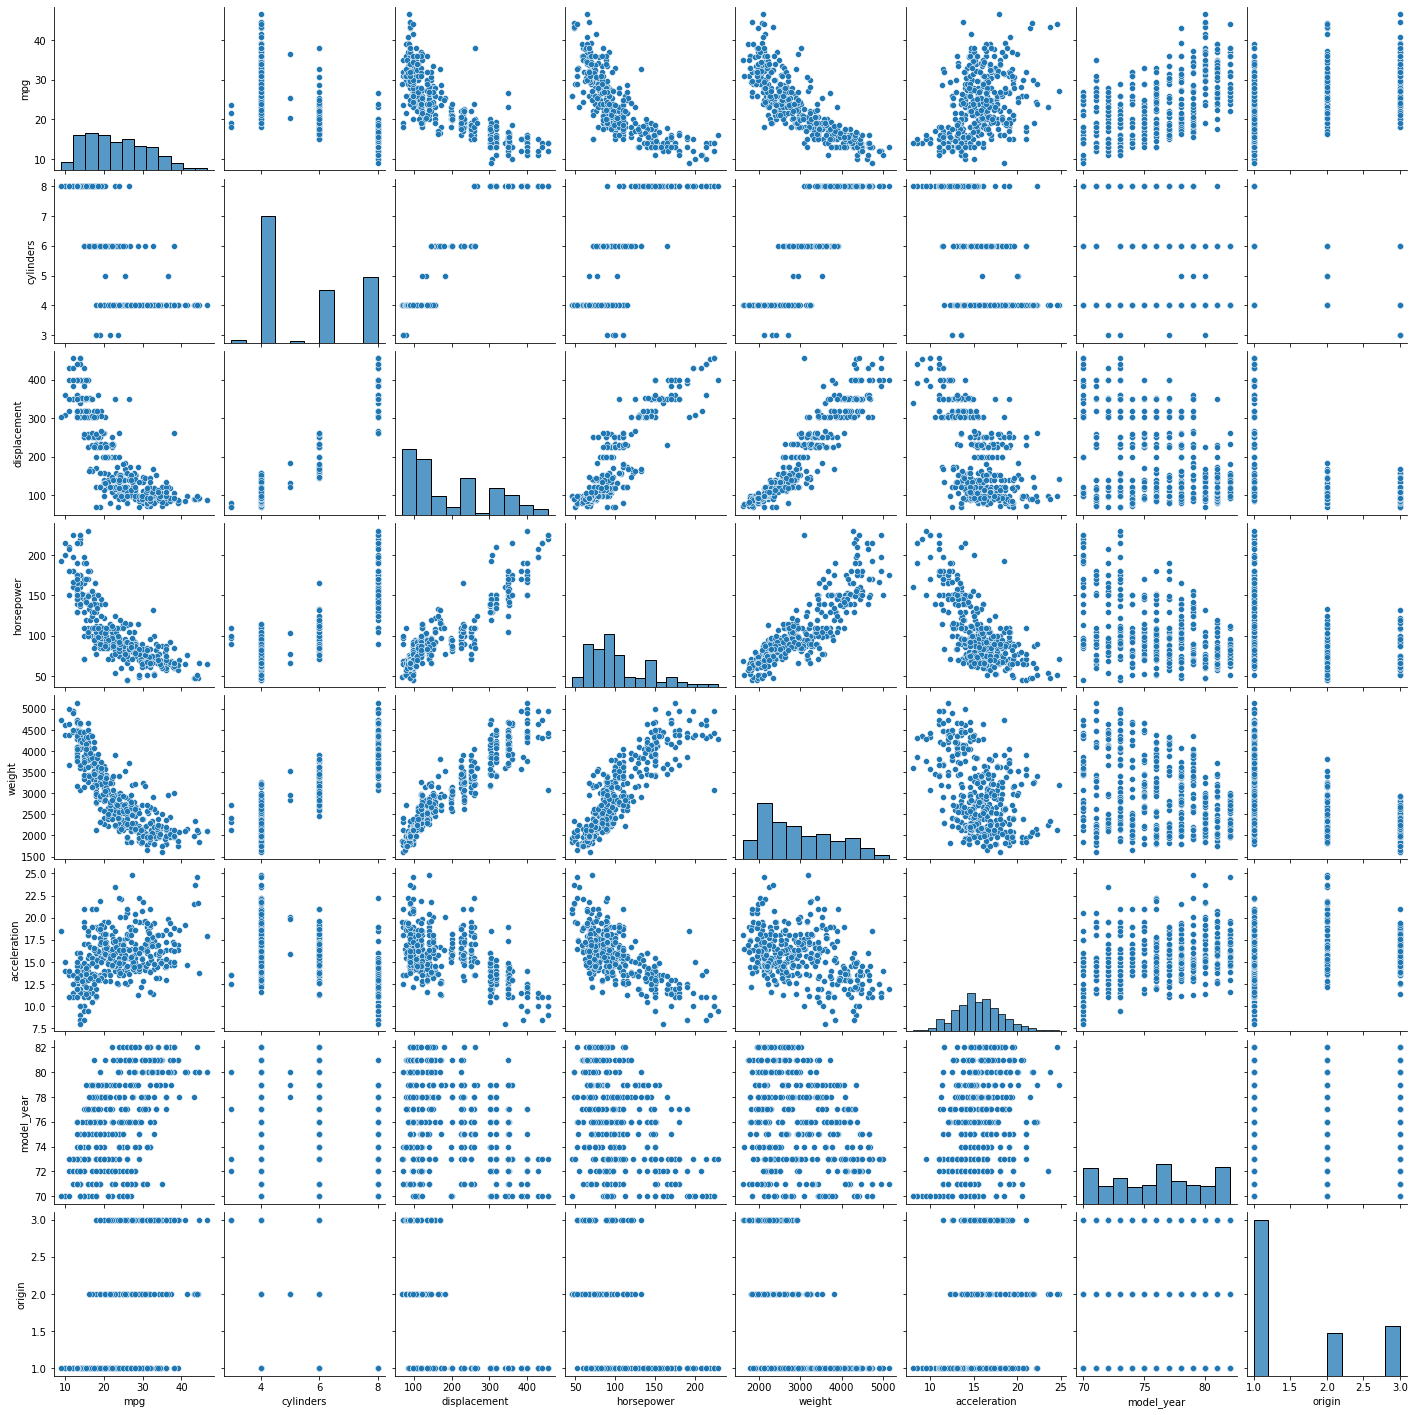

In [80]:
sns.pairplot(df)

In [81]:
df.columns

Index(['manfacturer', 'mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'model_year', 'origin'],
      dtype='object')

In [82]:
col = (['mpg', 'cylinders', 'horsepower',
       'weight', 'acceleration', 'origin'])

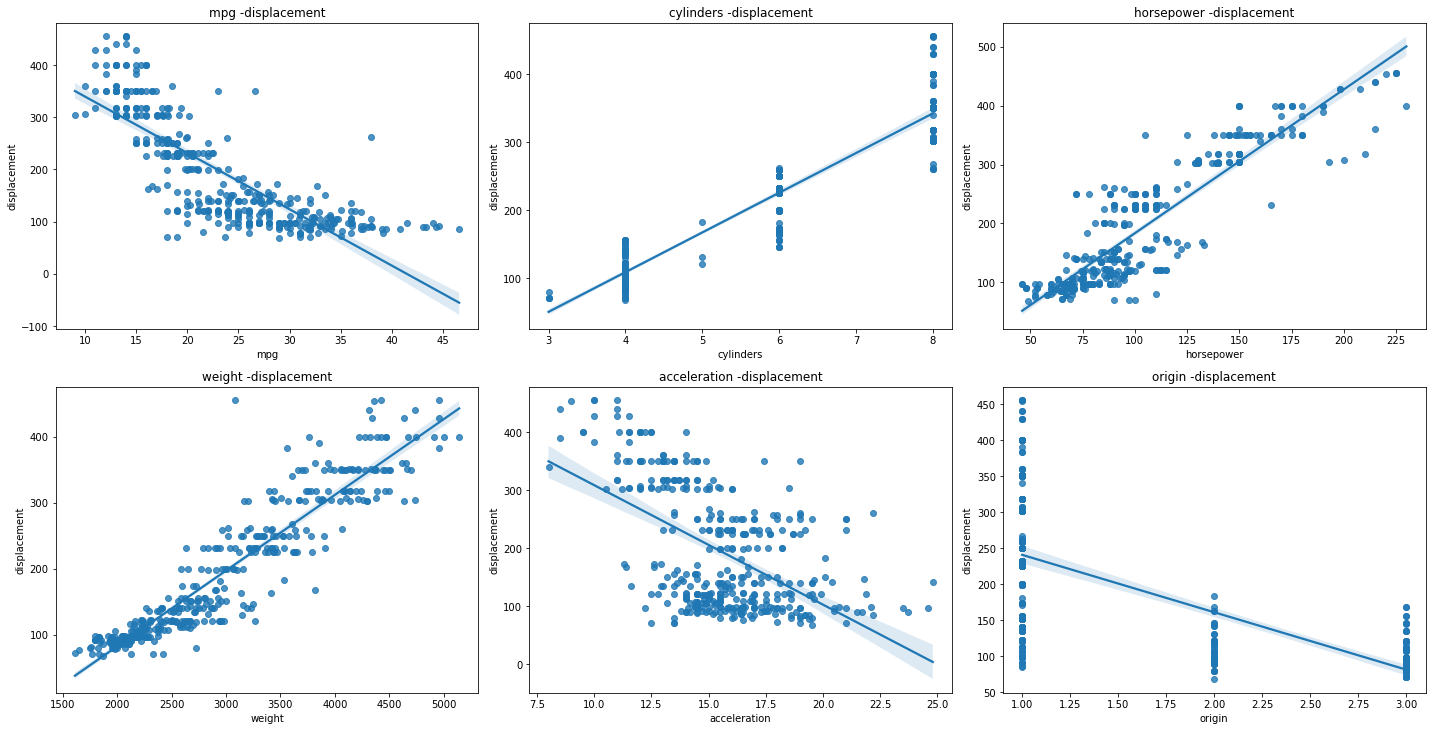

In [83]:
plt.figure(figsize=(20,25))

for i in range(len(col)):
    plt.subplot(5,3,i+1)
    plt.title(col[i]+' -displacement')
    sns.regplot(x=eval('df' + '.' + col[i]), y=df.displacement)
    
plt.tight_layout()

In [84]:
df.drop(columns=['model_year'],axis=1,inplace=True)

<AxesSubplot:>

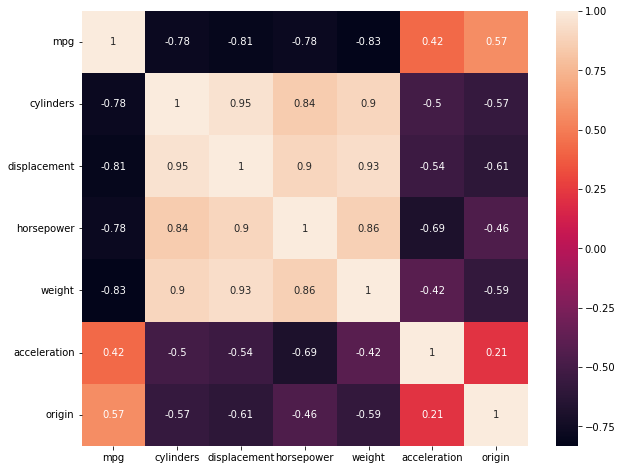

In [85]:
plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)

In [86]:
cars = df.copy()

In [87]:
cars.drop(columns=['manfacturer'],axis=1,inplace=True)

In [88]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,1.0


In [89]:
y = cars.pop('displacement')

In [90]:
y.head()

0    307.0
1    350.0
2    318.0
3    304.0
4    302.0
Name: displacement, dtype: float64

In [91]:
y = y.values.reshape(-1,1)

In [92]:
y.shape

(392, 1)

In [93]:
x = cars

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lr = LinearRegression()

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.70,random_state=100)

In [98]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(117, 6)
(117, 1)
(275, 6)
(275, 1)


In [99]:
lr.fit(x_train,y_train)

LinearRegression()

In [100]:
pd.DataFrame(lr.intercept_, columns=['intersept'])

,intersept
0,-180.379187


In [101]:
cars.head()

,mpg,cylinders,horsepower,weight,acceleration,origin
0,18.0,8.0,130.0,3504.0,12.0,1.0
1,15.0,8.0,165.0,3693.0,11.5,1.0
2,18.0,8.0,150.0,3436.0,11.0,1.0
3,16.0,8.0,150.0,3433.0,12.0,1.0
4,17.0,8.0,140.0,3449.0,10.5,1.0


In [102]:
pd.DataFrame(lr.coef_,columns = cars.columns)

,mpg,cylinders,horsepower,weight,acceleration,origin
0,1.660435,29.64642,1.174081,0.022669,0.273876,-12.693927


In [103]:
y_pred = lr.predict(x_test)

In [104]:
y_pred

array([[204.38951367],
       [ 83.3973955 ],
       [ 97.67384509],
       [189.68344691],
       [120.93936808],
       [348.18885644],
       [108.55090684],
       [227.78429153],
       [138.83382227],
       [199.46651772],
       [220.89728854],
       [206.97648261],
       [193.30642573],
       [177.6169797 ],
       [100.49832991],
       [119.39880861],
       [419.84774486],
       [ 76.94528897],
       [232.02110932],
       [139.12677722],
       [390.95245516],
       [224.59332286],
       [380.70232977],
       [142.81626636],
       [144.66246348],
       [ 92.67525618],
       [ 89.87314982],
       [332.37041483],
       [ 91.55340723],
       [283.16953126],
       [109.74137393],
       [312.8897371 ],
       [177.79664288],
       [349.59374687],
       [ 75.80676225],
       [330.75182315],
       [117.39286279],
       [ 57.87936125],
       [217.23616038],
       [392.42436687],
       [107.3975498 ],
       [193.04141006],
       [228.61927985],
       [332

In [105]:
from sklearn.metrics import r2_score, mean_squared_error

In [106]:
r2 = r2_score(y_test,y_pred);r2

0.9367888278823552

In [107]:
mse = mean_squared_error(y_test,y_pred);mse

637.3484167741195

In [108]:
import math as ss

In [109]:
rmse = ss.sqrt(mse);rmse

25.245760372270816

In [110]:
import statsmodels.api as sm

In [111]:
x_train_ols = sm.add_constant(x_train)

In [112]:
x_train_ols.head()

,const,mpg,cylinders,horsepower,weight,acceleration,origin
147,1.0,14.0,8.0,150.0,4257.0,15.5,1.0
232,1.0,17.5,6.0,110.0,3520.0,16.4,1.0
229,1.0,17.0,8.0,110.0,4060.0,19.0,1.0
75,1.0,13.0,8.0,155.0,4502.0,13.5,1.0
117,1.0,22.0,4.0,94.0,2379.0,16.5,3.0


In [113]:
smModel = sm.OLS(y_train, x_train_ols)

In [114]:
model = smModel.fit()

In [115]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     449.1
Date:                Wed, 10 May 2023   Prob (F-statistic):           6.48e-75
Time:                        13:02:54   Log-Likelihood:                -528.66
No. Observations:                 117   AIC:                             1071.
Df Residuals:                     110   BIC:                             1091.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -180.3792     35.349     -5.103   

<AxesSubplot:>

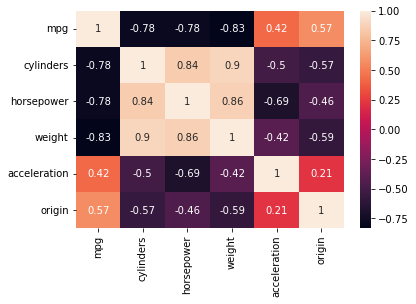

In [116]:
sns.heatmap(cars.corr("pearson"),annot=True)

In [125]:
cars.drop(columns=['acceleration'],axis=1,inplace=True);cars

,mpg,cylinders,horsepower,weight,origin
0,18.0,8.0,130.0,3504.0,1.0
1,15.0,8.0,165.0,3693.0,1.0
2,18.0,8.0,150.0,3436.0,1.0
3,16.0,8.0,150.0,3433.0,1.0
4,17.0,8.0,140.0,3449.0,1.0
...,...,...,...,...,...
401,27.0,4.0,86.0,2790.0,1.0
402,44.0,4.0,52.0,2130.0,2.0
403,32.0,4.0,84.0,2295.0,1.0
404,28.0,4.0,79.0,2625.0,1.0


In [126]:
x = cars 

In [127]:
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(x,y, test_size=0.70,random_state=100)

In [128]:
lr.fit(x_train_new,y_train_new)

LinearRegression()

In [129]:
y_pred_new = lr.predict(x_test_new)

In [130]:
y_pred_new

array([[204.35551305],
       [ 83.77383218],
       [ 98.15085238],
       [189.97441489],
       [120.45476835],
       [348.4341576 ],
       [108.85091146],
       [227.35070654],
       [139.25382883],
       [199.47902476],
       [220.77324375],
       [207.52434054],
       [193.4218231 ],
       [178.00912263],
       [100.89085325],
       [119.99894658],
       [419.90734906],
       [ 75.84017365],
       [231.39157711],
       [139.39917583],
       [391.50185828],
       [225.0530599 ],
       [380.77664527],
       [142.92823858],
       [144.93865269],
       [ 92.94669044],
       [ 90.97664627],
       [332.3094318 ],
       [ 91.35105101],
       [283.49642157],
       [109.98194388],
       [313.15047548],
       [177.25912733],
       [349.54203235],
       [ 76.0555855 ],
       [330.39042069],
       [117.83578826],
       [ 58.54102624],
       [216.9702101 ],
       [392.02130221],
       [107.40893073],
       [192.46835993],
       [227.9757462 ],
       [332

In [132]:
r2_new = r2_score(y_test_new,y_pred_new);r2_new

0.9370113735695869

In [135]:
mse_new = mean_squared_error(y_test_new,y_pred_new);mse_new

635.1045232238934

In [136]:
rmse_new = ss.sqrt(mse_new);rmse_new

25.2012801901787

In [138]:
x_train_ols_n = sm.add_constant(x_train_new);x_train_ols_n

,const,mpg,cylinders,horsepower,weight,origin
147,1.0,14.0,8.0,150.0,4257.0,1.0
232,1.0,17.5,6.0,110.0,3520.0,1.0
229,1.0,17.0,8.0,110.0,4060.0,1.0
75,1.0,13.0,8.0,155.0,4502.0,1.0
117,1.0,22.0,4.0,94.0,2379.0,3.0
...,...,...,...,...,...,...
354,1.0,37.0,4.0,65.0,1975.0,3.0
372,1.0,26.6,8.0,105.0,3725.0,1.0
332,1.0,44.3,4.0,48.0,2085.0,2.0
289,1.0,22.3,4.0,88.0,2890.0,1.0


In [139]:
smModel_new = sm.OLS(y_train_new, x_train_ols_n)

In [140]:
model_new = smModel_new.fit()

In [143]:
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     543.6
Date:                Wed, 10 May 2023   Prob (F-statistic):           2.70e-76
Time:                        13:44:40   Log-Likelihood:                -528.69
No. Observations:                 117   AIC:                             1069.
Df Residuals:                     111   BIC:                             1086.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -175.3064     26.228     -6.684      0.0

-----------------------------------------------------------------------------------------------------------------------

###### CUb Analysis

The Cylinders variable changes the Displacement the most

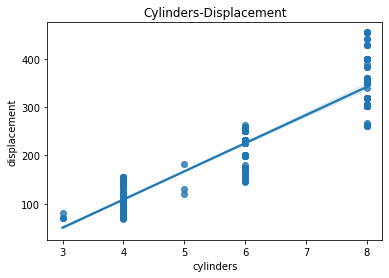

In [146]:
plt.title('Cylinders-Displacement')
sns.regplot(x = df.cylinders, y = df.displacement)
plt.show()

Even though there is an inverse relationship, the Origin variable changes effectively the Displacement also.

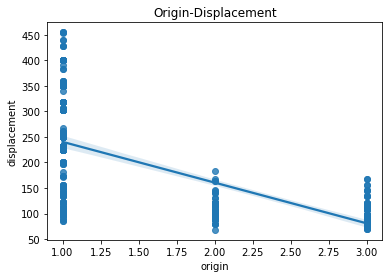

In [147]:
plt.title('Origin-Displacement')
sns.regplot(x = df.origin, y = df.displacement)
plt.show()